In [1]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from claude3 import Analyticsfunction, extract_python_code


obj = Analyticsfunction()
    
claude3 = obj.call_claude_sonet_text

In [2]:
# !python3 -m pip install boto3
# !python3 -m pip install python-docx


In [3]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
        
    return '\n'.join(fullText)

In [4]:
note = getText("Vector-notes.docx")

In [5]:
prompt =f'''Human: create question 2 multiple choice question and answer

<book>
{note}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
text = claude3(body)
display(Markdown(text))

Here are two multiple choice questions based on the given text:

1. What is the scalar triple product of three vectors a, b, and c?
(a) a.(b x c)
(b) a x (b x c)
(c) (a.b)c - (a.c)b
(d) (a x b).c 

2. For three vectors a, b, and c to be coplanar, the condition is:
(a) a.(b x c) = 0
(b) a x (b x c) = 0  
(c) (a x b).c = 0
(d) (a.b)c = a x b x c

In [6]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [46]:
prompt =f'''Human: write python code to draw equal side hexagon(six-sided polygon) using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. always complete all edges in drawing
5. keep diagram properly aligned for mathematics
6. if required give the name for each edges like (A,B...)
<context>
{context}
</context>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [55]:
text = claude3(body)

In [56]:
output_file = "output_python_code.py"  # Change this to your output file
extract_python_code(text, output_file)

In [57]:
display(Markdown(text))

Here's a Python code to draw an equal-sided hexagon using Matplotlib, following the given requirements:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the vertices of the hexagon
side_length = 4  # Change this value to adjust the size of the hexagon
angles = np.linspace(0, 2*np.pi, 7)[:-1]  # Angles for each vertex
x = side_length * np.cos(angles)
y = side_length * np.sin(angles)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the hexagon
ax.plot(x, y, 'k-')
ax.plot([x[0], x[-1]], [y[0], y[-1]], 'k-')  # Connect the first and last points

# Label the vertices
labels = ['A', 'B', 'C', 'D', 'E', 'F']
for i, (x_val, y_val) in enumerate(zip(x, y)):
    ax.annotate(labels[i], (x_val, y_val), xytext=(5, 5), textcoords='offset points')

# Add context to the image
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."
ax.set_title(context, fontsize=12, pad=20)

# Set aspect ratio and remove ticks
ax.set_aspect('equal')
ax.set_xticks([])
ax.set_yticks([])

# Save the figure as a JPG file
plt.savefig('hexagon.jpg', dpi=300, bbox_inches='tight')
plt.show()
```

This code will generate an equal-sided hexagon with labeled vertices (A, B, C, D, E, F) and the given context at the top of the image. The image will be saved as `hexagon.jpg` in the current working directory.

Note: Make sure you have `matplotlib` and `numpy` installed before running this code.

In [58]:
!python3 output_python_code.py

Figure(800x800)


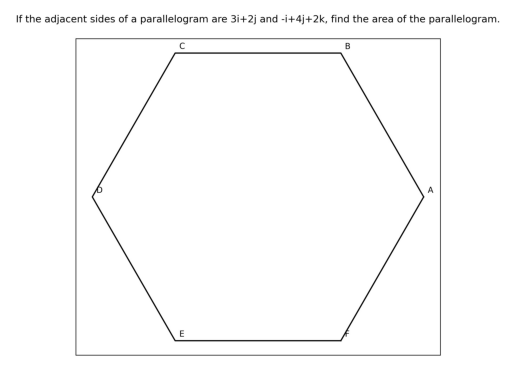

In [59]:
# Load the image
img = mpimg.imread('hexagon.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [62]:
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

In [63]:
prompt =f'''Human: write python code to draw triangle using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. always complete all edges in drawing
5. keep diagram properly aligned for mathematics
6. if required give the name for each edges like (A,B...)
<context>
{context}
</context>

Assistant:'''


#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [64]:
text = claude3(prompt)
output_file = "output_python_code_2.py"
extract_python_code(text, output_file)

In [65]:
!python3 output_python_code_2.py

Figure(800x600)


In [66]:
display(Markdown(text))

Here's the Python code to draw a triangle using Matplotlib, save it as a JPG file, add context to the image, and label the edges if required:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the position vectors of the vertices
A = np.array([1, 2, 3])  # αi+βj+γk
B = np.array([2, 3, 1])  # βi+γj+αk
C = np.array([3, 1, 2])  # γi+αj+βk

# Calculate the edge vectors
AB = B - A
BC = C - B
CA = A - C

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the triangle
ax.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='A')
ax.quiver(A[0], A[1], AB[0], AB[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(B[0], B[1], BC[0], BC[1], angles='xy', scale_units='xy', scale=1, color='r')
ax.quiver(C[0], C[1], CA[0], CA[1], angles='xy', scale_units='xy', scale=1, color='r')

# Set aspect ratio to equal
ax.set_aspect('equal')

# Add labels for vertices and edges
ax.text(A[0], A[1], 'A', fontsize=12)
ax.text(B[0], B[1], 'B', fontsize=12)
ax.text(C[0], C[1], 'C', fontsize=12)
ax.text((A[0] + B[0]) / 2, (A[1] + B[1]) / 2, 'AB', fontsize=12)
ax.text((B[0] + C[0]) / 2, (B[1] + C[1]) / 2, 'BC', fontsize=12)
ax.text((C[0] + A[0]) / 2, (C[1] + A[1]) / 2, 'CA', fontsize=12)

# Add context to the top of the image
context = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is"
ax.text(0.5, 1.05, context, transform=ax.transAxes, fontsize=12, ha='center', va='bottom')

# Save the figure as a JPG file
plt.savefig('triangle.jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()
```

This code does the following:

1. Defines the position vectors of the vertices A, B, and C.
2. Calculates the edge vectors AB, BC, and CA.
3. Creates a figure and axis using Matplotlib.
4. Plots the triangle using the `quiver` function, which draws arrows representing the position and edge vectors.
5. Sets the aspect ratio of the plot to equal, ensuring the triangle is drawn correctly.
6. Adds labels for the vertices (A, B, C) and edges (AB, BC, CA) using the `text` function.
7. Adds the context to the top of the image using the `text` function with the `transform` parameter set to `ax.transAxes`.
8. Saves the figure as a JPG file named 'triangle.jpg' with a resolution of 300 dpi and tight bounding box.
9. Displays the plot using `plt.show()`.

The resulting image will show a triangle with labeled vertices and edges, along with the provided context at the top of the image.

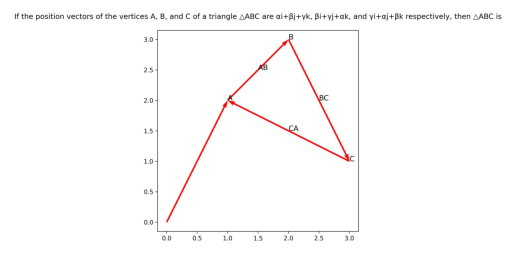

In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('triangle.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

In [68]:
context = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

In [69]:
prompt =f'''Human: write python code to draw parallelogram using matplotlib
1. save as jpg
2. context into the image at top. 
3. draw correct shape
4. always complete all edges in drawing
5. keep diagram properly aligned for mathematics
6. if required give the name for each edges like (A,B...)
<context>
{context}
</context>

Assistant:'''

#body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [70]:
text = claude3(prompt)

In [72]:
output_file = "output_python_code_3.py"
extract_python_code(text, output_file)

In [73]:
!python3 output_python_code_3.py

Figure(800x600)


In [74]:
display(Markdown(text))

Here's a Python code to draw a parallelogram using Matplotlib, save it as a JPG file, add the given context as a title, and label the edges if required:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the adjacent sides of the parallelogram
side1 = np.array([3, 2, 0])  # 3i + 2j
side2 = np.array([-1, 4, 2])  # -i + 4j + 2k

# Calculate the vertices of the parallelogram
vertex1 = np.array([0, 0, 0])
vertex2 = vertex1 + side1
vertex3 = vertex2 + side2
vertex4 = vertex1 + side2

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw={'projection': '3d'})

# Plot the parallelogram
ax.plot([vertex1[0], vertex2[0]], [vertex1[1], vertex2[1]], [vertex1[2], vertex2[2]], 'r-')
ax.plot([vertex2[0], vertex3[0]], [vertex2[1], vertex3[1]], [vertex2[2], vertex3[2]], 'r-')
ax.plot([vertex3[0], vertex4[0]], [vertex3[1], vertex4[1]], [vertex3[2], vertex4[2]], 'r-')
ax.plot([vertex4[0], vertex1[0]], [vertex4[1], vertex1[1]], [vertex4[2], vertex1[2]], 'r-')

# Label the edges if required
ax.text(vertex1[0], vertex1[1], vertex1[2], 'A', fontsize=12)
ax.text(vertex2[0], vertex2[1], vertex2[2], 'B', fontsize=12)
ax.text(vertex3[0], vertex3[1], vertex3[2], 'C', fontsize=12)
ax.text(vertex4[0], vertex4[1], vertex4[2], 'D', fontsize=12)

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram.')

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-5, 5)

# Save the figure as a JPG file
plt.savefig('parallelogram.jpg', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
```

This code will generate a 3D plot of the parallelogram with the given adjacent sides (3i+2j and -i+4j+2k). The vertices of the parallelogram are labeled as A, B, C, and D if required. The context is added as the title of the plot. Finally, the plot is saved as a JPG file named 'parallelogram.jpg' with a resolution of 300 DPI.

Note: Make sure you have Matplotlib installed before running this code.

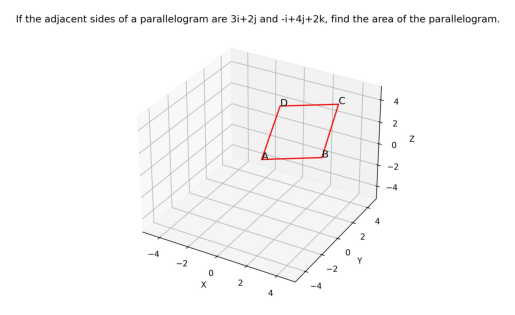

In [75]:
img = mpimg.imread('parallelogram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()